### Examining Investigations input data

In [144]:
import pandas as pd
import numpy as np
import plotnine as p9
import plotly.express as px  # Be sure to import express

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [145]:
just_investigations = pd.read_csv('./my_data/repMatrix2.csv')
just_investigations.columns

Index(['Unnamed: 0', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_STATE', 'AGENT_POC_EMPLOYER_REP_BY_AGENT',
       'BASIC_NUMBER_OF_HOURS', 'BASIC_RATE_OF_PAY', 'BASIC_UNIT_OF_PAY',
       'CASE_NO', 'CASE_RECEIVED_DATE', 'CASE_STATUS', 'DECISION_DATE',
       'EDUCATION_LEVEL', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_COUNTRY', 'EMPLOYER_NAME', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PROVINCE',
       'EMPLOYER_STATE', 'EMP_EXPERIENCE_REQD', 'EMP_EXP_NUM_MONTHS',
       'FULL_TIME', 'HOURLY_WORK_SCHEDULE_AM', 'HOURLY_WORK_SCHEDULE_PM',
       'JOB_END_DATE', 'JOB_IDNUMBER', 'JOB_START_DATE', 'JOB_TITLE',
       'LAWFIRM_NAME', 'MAJOR', 'NAICS_CODE', 'NAME_REQD_TRAINING',
       'NATURE_OF_TEMPORARY_NEED', 'NBR_WORKERS_CERTIFIED',
       'NBR_WORKERS_REQUESTED', 'NUM_MONTHS_TRAINING', 'ORGANIZATION_FLAG',
       'OTHER_EDU', 'OTHER_WORKSITE_LOCATION', 'OVERTIME_RATE_FROM',
       'OVERT

In [146]:
def check_distrib_catstat(adf, var_of_int, viol_or_invest, color_quant = 0.95, dropNA=True): 
    
    # get the dataframe into a useful df where we have the pct of employers under each level of var_of_int
    # so we can graph it
    crop_by_violator = adf.groupby(var_of_int).is_violator.value_counts().copy()
    crop_by_violator = pd.DataFrame(crop_by_violator)
    crop_by_violator.columns = ['COUNT']
    crop_by_violator = crop_by_violator.reset_index()
    crop_by_violator = crop_by_violator.pivot(index = var_of_int, columns='is_violator', values='COUNT').reset_index()
    crop_by_violator.columns = [var_of_int, 'FALSE', 'TRUE']
    crop_by_violator[viol_or_invest] = crop_by_violator['TRUE'] / (crop_by_violator['FALSE'] + crop_by_violator['TRUE'])
    crop_by_violator = crop_by_violator.dropna(subset=[viol_or_invest])
    nthpercentile = crop_by_violator[viol_or_invest].quantile(q=color_quant)
    crop_by_violator['is_nth'] = crop_by_violator[viol_or_invest] >= nthpercentile
    # display(crop_by_violator.sort_values(viol_or_invest, ascending=False).head())
    
    p1 = (p9.ggplot(data=crop_by_violator,
           mapping=p9.aes(x=var_of_int, y=viol_or_invest, fill='is_nth'))
          + p9.geom_bar(stat = "identity", position = 'dodge')
          + p9.labs(y=viol_or_invest, x=var_of_int, fill='Legend')
          + p9.theme_classic()
          + p9.theme()
          + p9.theme(axis_text_x = p9.element_text(rotation = 45, hjust=1, size = 7 ))
          + p9.scale_fill_manual(values = ['#ffa500', '#0367fc']))
    
    return crop_by_violator, p1

'\ndef check_distrib_catstat(var_of_int, viol_or_invest, color_quant = 0.95, dropNA=True): \n    \n    # get the dataframe into a useful df where we have the pct of employers under each level of var_of_int\n    # so we can graph it\n    crop_by_violator = just_investigations.groupby(var_of_int).is_violator.value_counts().copy()\n    crop_by_violator = pd.DataFrame(crop_by_violator)\n    crop_by_violator.columns = [\'COUNT\']\n    crop_by_violator = crop_by_violator.reset_index()\n    crop_by_violator = crop_by_violator.pivot(index = var_of_int, columns=\'is_violator\', values=\'COUNT\').reset_index()\n    crop_by_violator.columns = [var_of_int, \'FALSE\', \'TRUE\']\n    crop_by_violator[viol_or_invest] = crop_by_violator[\'TRUE\'] / (crop_by_violator[\'FALSE\'] + crop_by_violator[\'TRUE\'])\n    crop_by_violator = crop_by_violator.dropna(subset=[viol_or_invest])\n    nthpercentile = crop_by_violator[viol_or_invest].quantile(q=color_quant)\n    crop_by_violator[\'is_nth\'] = crop_by_vio

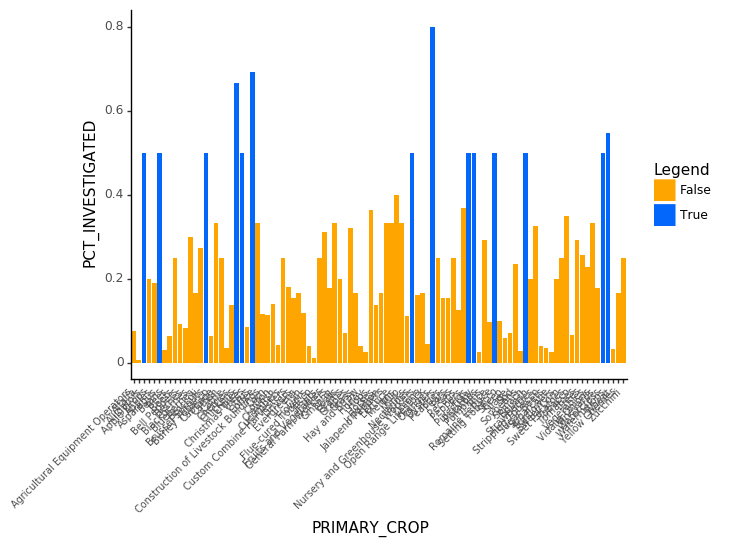

<ggplot: (313340801)>

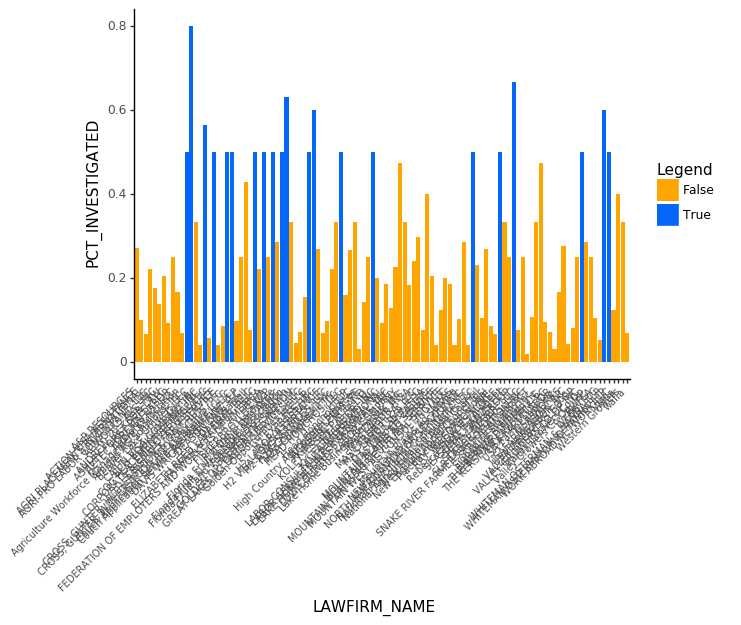

<ggplot: (315714577)>

In [147]:
crop_df, primary_crop_plot = check_distrib_catstat(just_investigations, 'PRIMARY_CROP', 'PCT_INVESTIGATED', 0.90)
lawfirm_df, lawfirm_plot = check_distrib_catstat(just_investigations, 'LAWFIRM_NAME', 'PCT_INVESTIGATED', 0.90)
state_df, state_plot = check_distrib_catstat(just_investigations, 'WORKSITE_STATE', 'PCT_INVESTIGATED', 0.90)

primary_crop_plot
lawfirm_plot


In [148]:
fig = px.choropleth(state_df,                    # Input Pandas DataFrame
                    locations="WORKSITE_STATE",  # DataFrame column with locations
                    color="PCT_INVESTIGATED",    # DataFrame column with color values
                    hover_name="WORKSITE_STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig = fig.update_layout(
    title_text = 'Percent of Employers Investigated by Worksite State', # Create a Title
    geo_scope='usa')  # Plot only the USA instead of globe)

fig.show()  # Output the plot to the screen

### Investigating Violations input data

In [149]:
just_violations = pd.read_csv('JGWorking/repMatrixHPC.csv')
just_violations.columns

Index(['Unnamed: 0', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_NAME',
       'AGENT_ATTORNEY_STATE', 'AGENT_POC_EMPLOYER_REP_BY_AGENT',
       'BASIC_NUMBER_OF_HOURS', 'BASIC_RATE_OF_PAY', 'BASIC_UNIT_OF_PAY',
       'CASE_NO', 'CASE_RECEIVED_DATE', 'CASE_STATUS', 'DECISION_DATE',
       'EDUCATION_LEVEL', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2',
       'EMPLOYER_CITY', 'EMPLOYER_COUNTRY', 'EMPLOYER_NAME', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'EMPLOYER_POSTAL_CODE', 'EMPLOYER_PROVINCE',
       'EMPLOYER_STATE', 'EMP_EXPERIENCE_REQD', 'EMP_EXP_NUM_MONTHS',
       'FULL_TIME', 'HOURLY_WORK_SCHEDULE_AM', 'HOURLY_WORK_SCHEDULE_PM',
       'JOB_END_DATE', 'JOB_IDNUMBER', 'JOB_START_DATE', 'JOB_TITLE',
       'LAWFIRM_NAME', 'MAJOR', 'NAICS_CODE', 'NAME_REQD_TRAINING',
       'NATURE_OF_TEMPORARY_NEED', 'NBR_WORKERS_CERTIFIED',
       'NBR_WORKERS_REQUESTED', 'NUM_MONTHS_TRAINING', 'ORGANIZATION_FLAG',
       'OTHER_EDU', 'OTHER_WORKSITE_LOCATION', 'OVERTIME_RATE_FROM',
       'OVERT

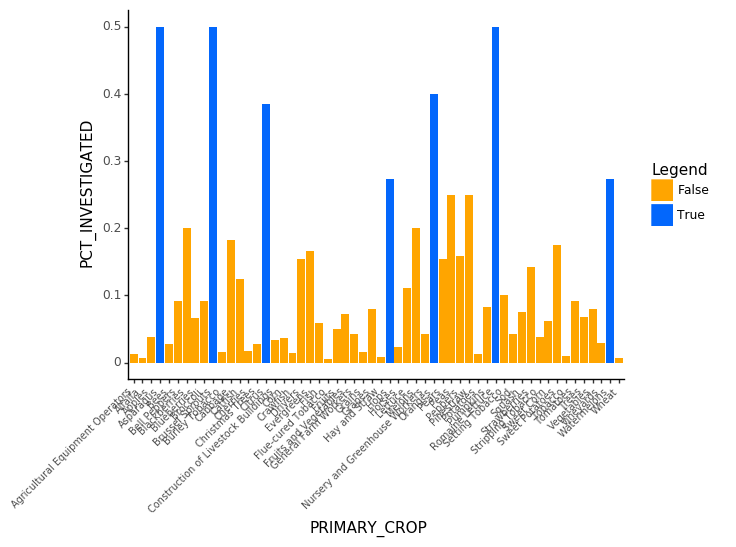

<ggplot: (295270709)>

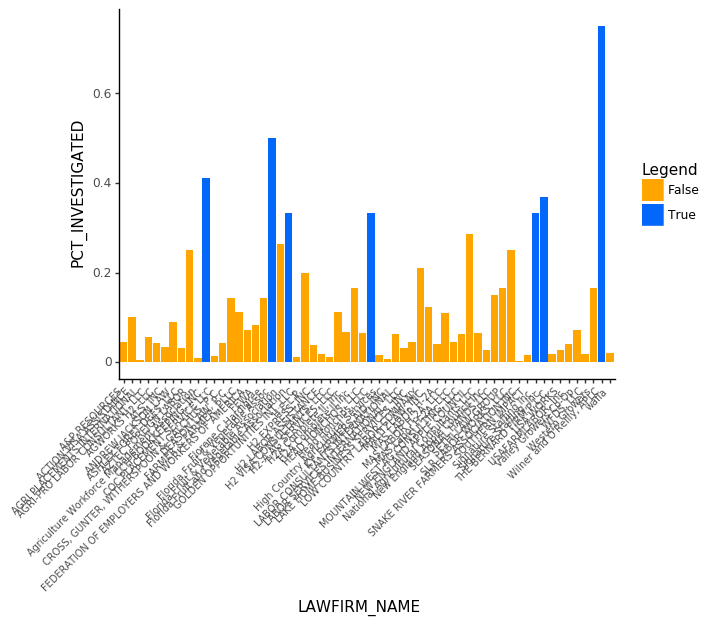

<ggplot: (312131461)>

In [150]:
crop_df, primary_crop_plot = check_distrib_catstat(just_violations, 'PRIMARY_CROP', 'PCT_INVESTIGATED', 0.90)
lawfirm_df, lawfirm_plot = check_distrib_catstat(just_violations, 'LAWFIRM_NAME', 'PCT_INVESTIGATED', 0.90)
state_df, state_plot = check_distrib_catstat(just_violations, 'WORKSITE_STATE', 'PCT_INVESTIGATED', 0.90)

primary_crop_plot
lawfirm_plot

In [152]:
fig = px.choropleth(state_df,                    # Input Pandas DataFrame
                    locations="WORKSITE_STATE",  # DataFrame column with locations
                    color="PCT_INVESTIGATED",    # DataFrame column with color values
                    hover_name="WORKSITE_STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig = fig.update_layout(
    title_text = 'Percent of Employer Found to be Violators by Worksite State', # Create a Title
    geo_scope='usa')  # Plot only the USA instead of globe)

fig.show()